In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Load the data

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Preprocess train data

In [4]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})

/tmp/ipykernel_17/3873404893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_17/3873404893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# Preprocess test data

In [5]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

/tmp/ipykernel_17/2299836163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
/tmp/ipykernel_17/2299836163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# Select features for model

In [6]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

In [7]:
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]


# Scale features

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the model

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Make predictions

In [10]:
y_pred = rf_model.predict(X_test_scaled)


# Create submission file

In [11]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred
})
submission.to_csv('rf_submission.csv', index=False)


# Compare with gender_submission

In [12]:
gender_accuracy = accuracy_score(gender_submission['Survived'], submission['Survived'])
print(f"Accuracy compared to gender submission: {gender_accuracy:.4f}")

Accuracy compared to gender submission: 0.8134


# Visualization

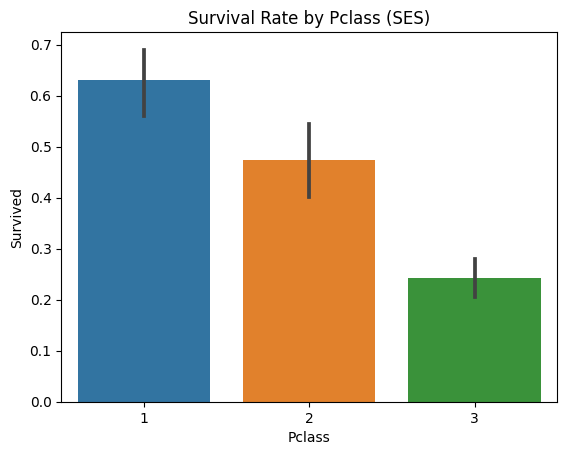

In [13]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass (SES)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

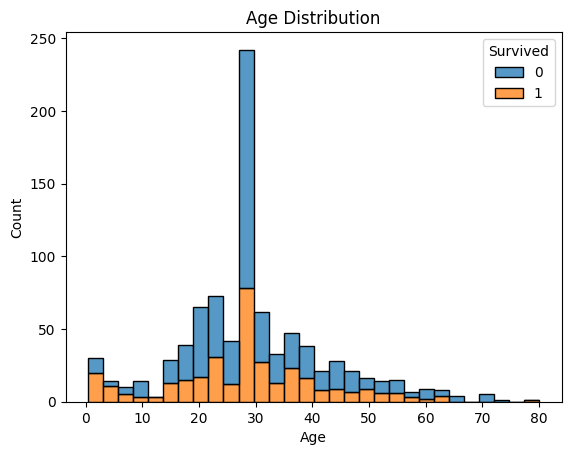

In [14]:
# Age distribution
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution')
plt.show()

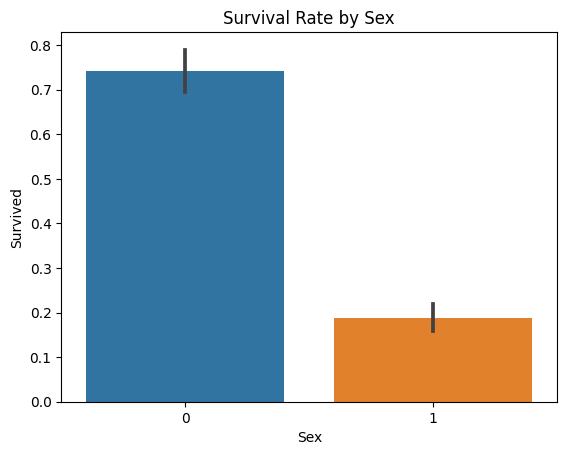

In [15]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

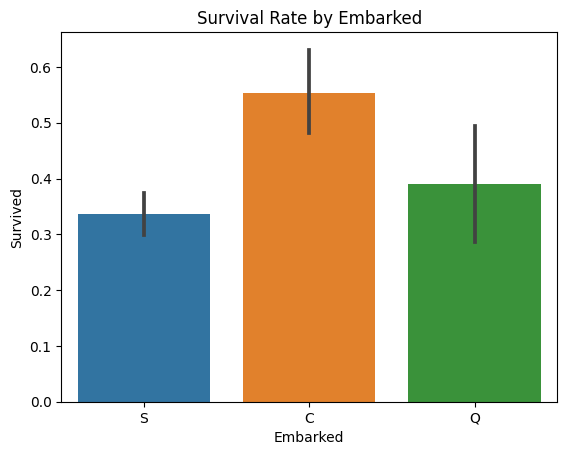

In [16]:
# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

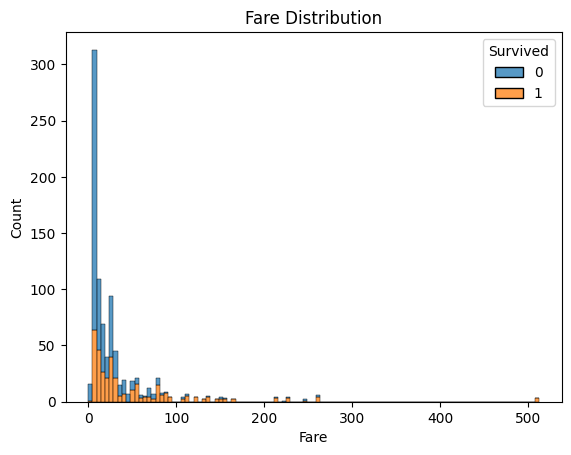

In [17]:
# Fare distribution
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack')
plt.title('Fare Distribution')
plt.show()

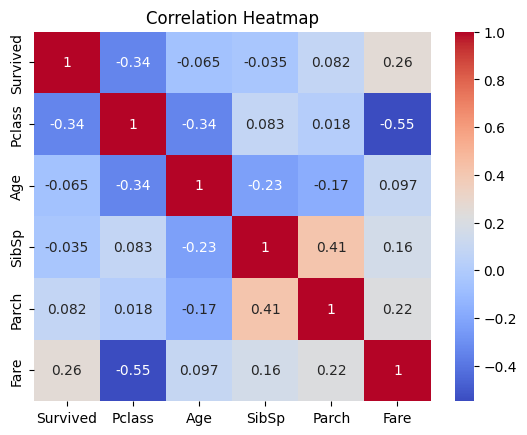

In [18]:
# Correlation heatmap
sns.heatmap(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature importance

In [19]:
# Feature importance
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)

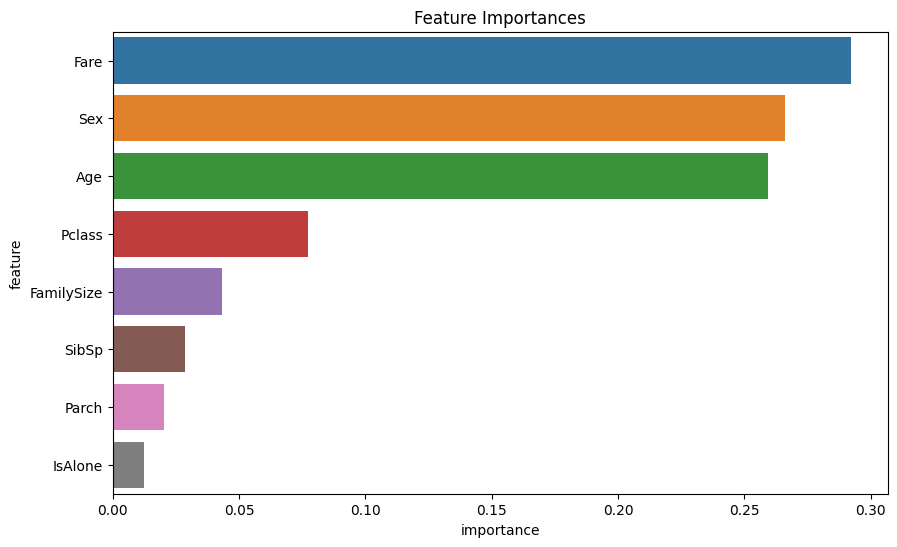

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

# Model evaluation (using cross-validation for demonstration)

In [21]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.77653631 0.80898876 0.85393258 0.78089888 0.83707865]
Mean CV score: 0.8115


In [22]:
# Print classification report
y_train_pred = rf_model.predict(X_train_scaled)
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



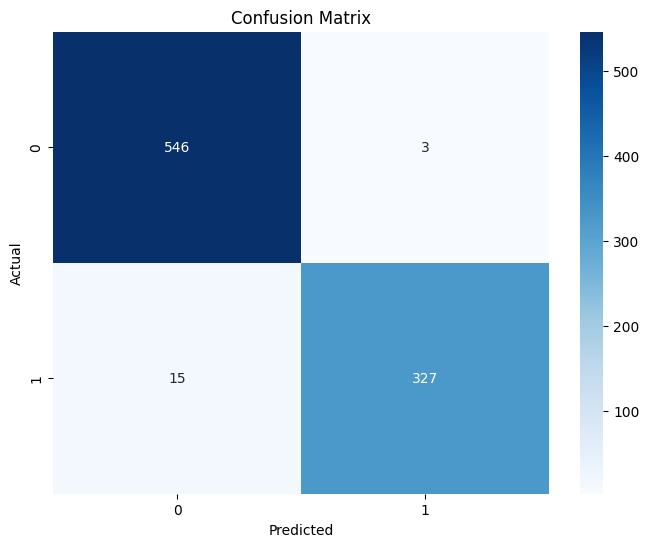

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Compare predictions with gender_submission

In [24]:
different_predictions = submission[submission['Survived'] != gender_submission['Survived']]
print(f"\nNumber of different predictions compared to gender submission: {len(different_predictions)}")


Number of different predictions compared to gender submission: 78


In [25]:
# Analyze where our model differs from the gender submission
different_predictions = different_predictions.merge(test_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], on='PassengerId')
print("\nSample of differing predictions:")
print(different_predictions.head())



Sample of differing predictions:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0          893         0       3    0  47.0      1      0   7.0000
1          894         1       2    1  62.0      0      0   9.6875
2          895         1       3    1  27.0      0      0   8.6625
3          896         0       3    0  22.0      1      1  12.2875
4          898         0       3    0  30.0      0      0   7.6292


# CountPlot Visualizations

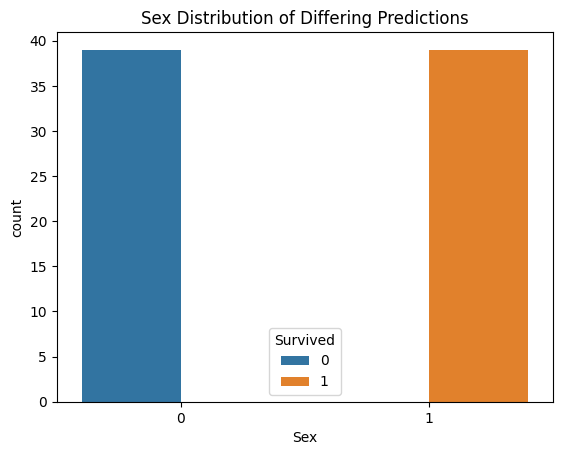

In [26]:
sns.countplot(x='Sex', hue='Survived', data=different_predictions)
plt.title('Sex Distribution of Differing Predictions')
plt.show()

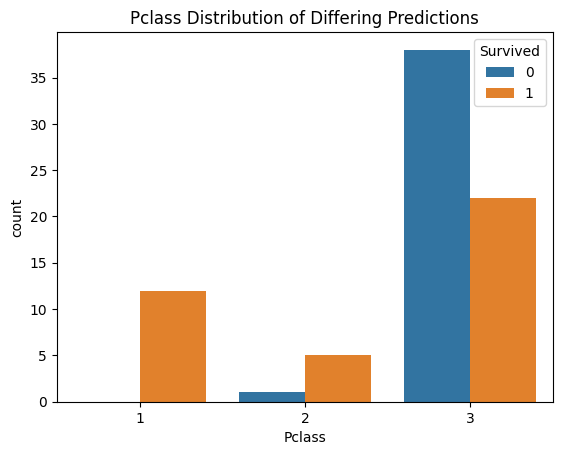

In [27]:
sns.countplot(x='Pclass', hue='Survived', data=different_predictions)
plt.title('Pclass Distribution of Differing Predictions')
plt.show()

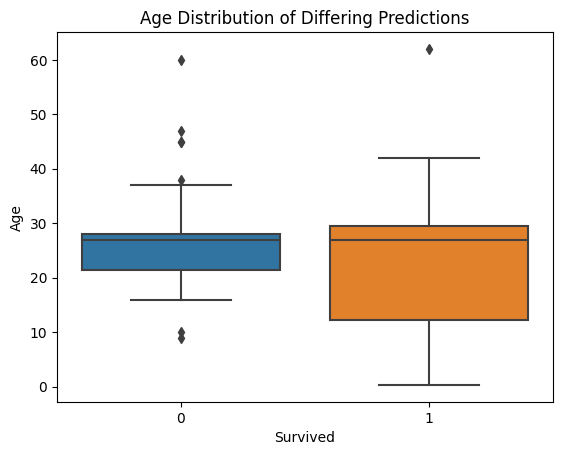

In [28]:
sns.boxplot(x='Survived', y='Age', data=different_predictions)
plt.title('Age Distribution of Differing Predictions')
plt.show()

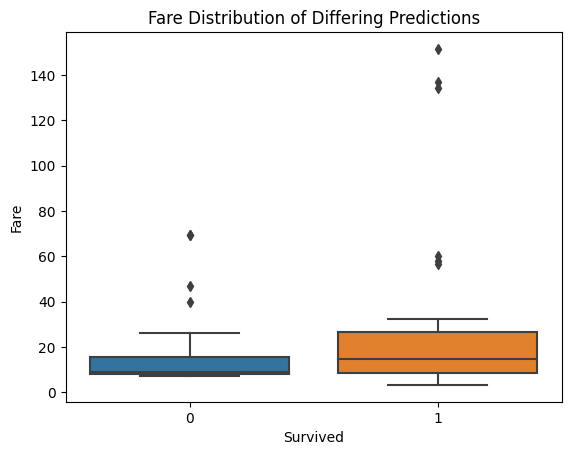

In [29]:
sns.boxplot(x='Survived', y='Fare', data=different_predictions)
plt.title('Fare Distribution of Differing Predictions')
plt.show()

# Conclusion

In this Titanic survival prediction project, we successfully implemented a machine learning model to predict the survival of passengers based on various features such as age, gender, fare, and class. After preprocessing the data using techniques like imputation and scaling, we trained a Random Forest Classifier, which provided solid performance in classifying survivors versus non-survivors.

Key insights from the project include:

    Significant Features: Variables such as gender (with females having a higher survival rate), age, and passenger class were found to have the strongest impact on survival.
    
    Model Performance: The model's accuracy score and cross-validation results indicate its reliability, though there may be room for improvement by fine-tuning    hyperparameters or exploring other classification algorithms.
This project demonstrates the effective application of machine learning techniques in classification tasks, particularly in predicting outcomes where multiple factors contribute to the final result. Future work could involve feature engineering or ensemble techniques to further enhance prediction accuracy.